In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the training set
train_data = pd.read_csv("./Dataset/Training and Testing Sets/UNSW_NB15_training-set.csv")

# Load the testing set
test_data = pd.read_csv("./Dataset/Training and Testing Sets/UNSW_NB15_testing-set.csv")

In [6]:
train_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [7]:
test_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [8]:
feature_list = pd.read_csv("./Dataset/NUSW-NB15_features.csv")

In [11]:
feature_list

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


# Basic info about the datasets

In [27]:
# train_data.describe().transpose()

In [13]:
print("Training Data Info:")
print(train_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-n

In [25]:
# test_data.describe().transpose()

In [24]:
print("\nTesting Data Info:")
print(test_data.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  si

# Print dimensions of the datasets

In [28]:
print("Training Data Dimensions (rows, columns):", train_data.shape)


print("Testing Data Dimensions (rows, columns):", test_data.shape)

Training Data Dimensions (rows, columns): (175341, 45)
Testing Data Dimensions (rows, columns): (82332, 45)


# Checking for Missing Data

We will check if there are any missing values in both the training and testing datasets.

In [29]:
print("Missing values in Training Data:")

print(train_data.isnull().sum())

Missing values in Training Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
i

In [30]:
print("\nMissing values in Testing Data:")

print(test_data.isnull().sum())


Missing values in Testing Data:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
i

# Checking for Redundant Data

Check for duplicate rows in the training and testing datasets

In [31]:
print("Duplicate rows in Training Data:", train_data.duplicated().sum())

Duplicate rows in Training Data: 0


In [32]:
print("Duplicate rows in Testing Data:", test_data.duplicated().sum())

Duplicate rows in Testing Data: 0


# Detect Outliers

We can look at the statistical summary of the data, and for each numerical column, we can check for unusually high or low values by identifying those beyond a certain range.

In [33]:
print("Statistical Summary of Training Data:")
display(train_data.describe())

Statistical Summary of Training Data:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [34]:
print("\nStatistical Summary of Testing Data:")
display(test_data.describe())


Statistical Summary of Testing Data:


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


# Class Imbalance

We will check for class imbalance using the 'label' column, which seems to represent whether a record is normal or an attack. 

Additionally, we'll inspect the 'attack_cat' column to check the distribution of attack types.

Examine the Distribution of Attack Classes and Normal Class

We have a column that labels each record as either a "normal" instance or one of several 9 attack types (e.g., DoS, Probe, etc.). 

We have examined the distribution of these categories above.

Class distribution in Training Data ('label' column):
label
1    119341
0     56000
Name: count, dtype: int64


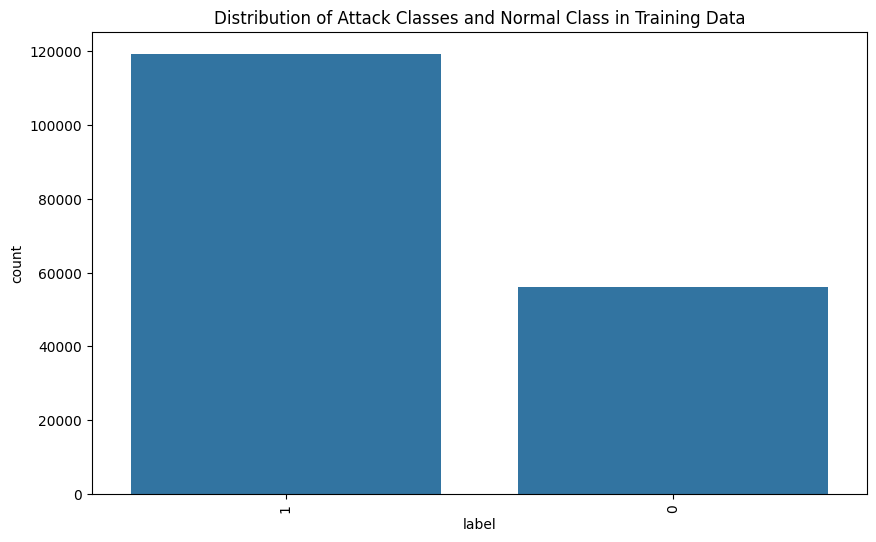

In [46]:
# Check class distribution in the training set
print("Class distribution in Training Data ('label' column):")
print(train_data['label'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label', order=train_data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes and Normal Class in Training Data')
plt.show()

Check for Imbalances Between Different Attack Classes

If the label column contains both normal and attack classes, we will want to check how many samples are available for each specific attack class. 

This can help identify if some attack classes are underrepresented or overrepresented.


Attack categories distribution in Training Data ('attack_cat' column):
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64


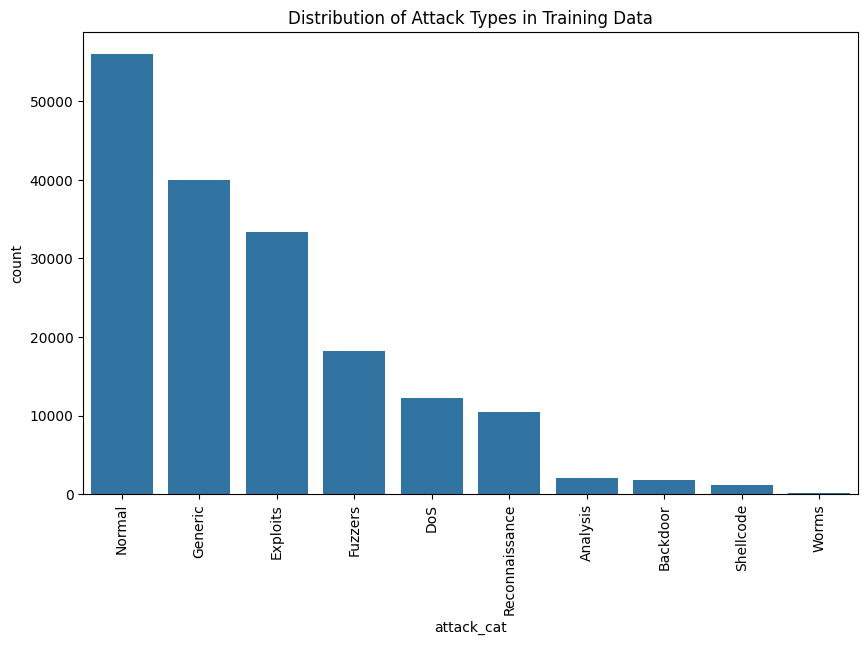

In [53]:
# Check attack categories distribution in the training set
print("\nAttack categories distribution in Training Data ('attack_cat' column):")
print(train_data['attack_cat'].value_counts())


# Plot attack type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='attack_cat', order=train_data['attack_cat'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.show()


Class distribution in Testing Data ('label' column):
label
1    45332
0    37000
Name: count, dtype: int64


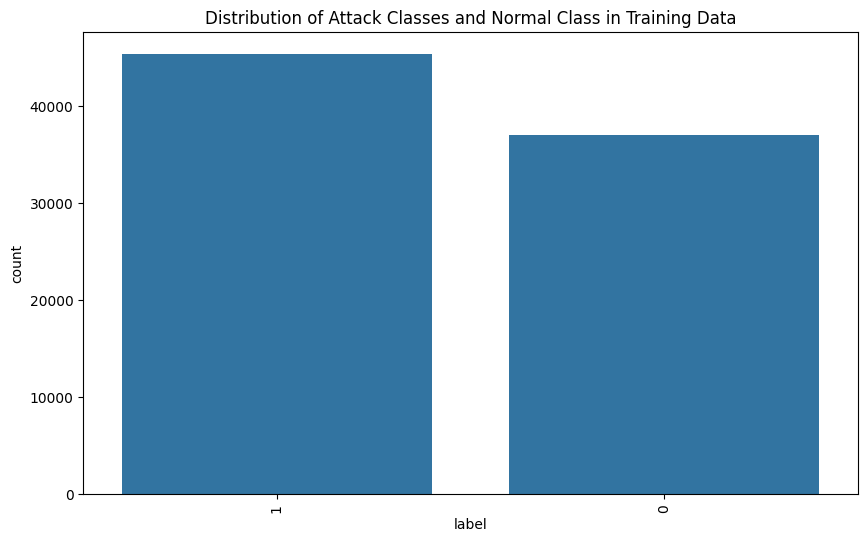

In [47]:
# Check class distribution in the testing set
print("\nClass distribution in Testing Data ('label' column):")
print(test_data['label'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(data=test_data, x='label', order=test_data['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Classes and Normal Class in Training Data')
plt.show()


Attack categories distribution in Testing Data ('attack_cat' column):
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


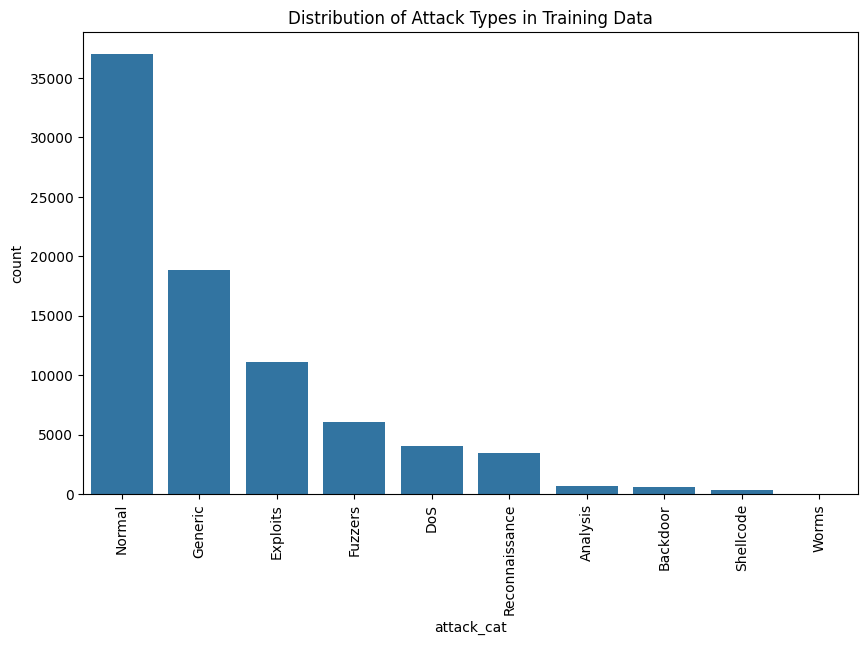

In [55]:
# Check attack categories distribution in the testing set
print("\nAttack categories distribution in Testing Data ('attack_cat' column):")
print(test_data['attack_cat'].value_counts())



# Plot attack type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=test_data, x='attack_cat', order=test_data['attack_cat'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.show()

# Correlation matrix

Highly Correlated Features:
           Feature 1         Feature 2  Correlation
0             sbytes             spkts     0.963791
1             dbytes             dpkts     0.971907
2              sloss             spkts     0.971069
3              sloss            sbytes     0.996109
4              dloss             dpkts     0.978636
5              dloss            dbytes     0.996504
6               dwin              swin     0.990140
7             synack            tcprtt     0.949468
8             ackdat            tcprtt     0.941760
9   ct_src_dport_ltm        ct_dst_ltm     0.962052
10  ct_dst_sport_ltm  ct_src_dport_ltm     0.906793
11    ct_dst_src_ltm        ct_srv_src     0.967138
12        ct_ftp_cmd      is_ftp_login     1.000000
13        ct_srv_dst        ct_srv_src     0.980323
14        ct_srv_dst    ct_dst_src_ltm     0.972370
15   is_sm_ips_ports            sinpkt     0.941319


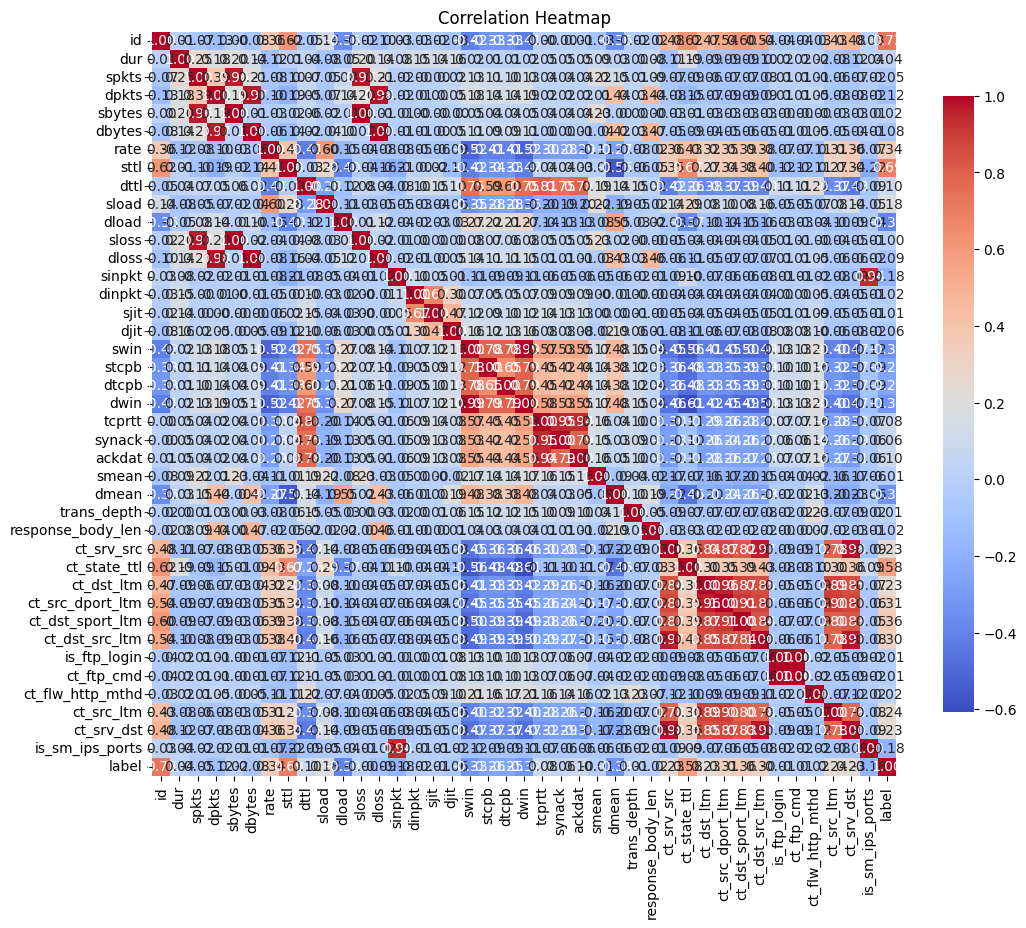

In [56]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Step 3: Identify highly correlated features
threshold = 0.9
high_corr_pairs = []

# Loop through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print highly correlated features
print("Highly Correlated Features:")
print(high_corr_df)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

## Principal Component Analysis (PCA)¶

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that can help identify the most relevant features in a dataset, especially when dealing with high-dimensional data like intrusion detection datasets. 

By projecting the data into a lower-dimensional space, PCA allows you to capture the most variance with fewer features, which can be useful for improving model performance and interpretability.

    Principal Component  Explained Variance  Cumulative Variance
0                     1        2.534920e-01             0.253492
1                     2        9.801167e-02             0.351504
2                     3        9.161393e-02             0.443118
3                     4        7.537880e-02             0.518496
4                     5        6.336689e-02             0.581863
5                     6        5.206430e-02             0.633928
6                     7        4.865554e-02             0.682583
7                     8        4.559582e-02             0.728179
8                     9        2.897255e-02             0.757151
9                    10        2.892358e-02             0.786075
10                   11        2.357298e-02             0.809648
11                   12        2.154806e-02             0.831196
12                   13        1.885778e-02             0.850054
13                   14        1.824921e-02             0.868303
14                   15  

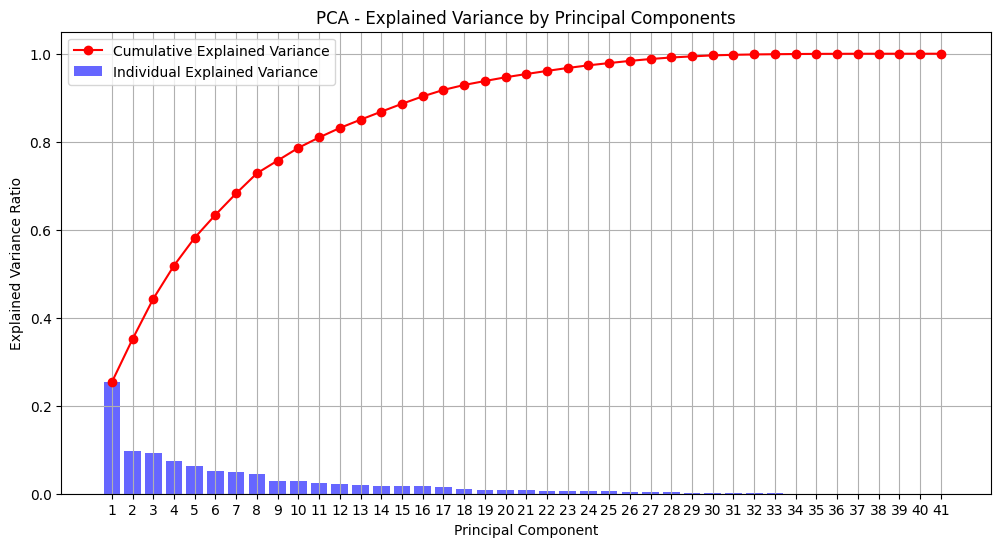

In [57]:
# Step 1: Select only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_data = train_data[numeric_columns]

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Analyze the results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Print explained variance
print(explained_variance_df)

# Step 5: Visualize explained variance
plt.figure(figsize=(12, 6))
plt.bar(explained_variance_df['Principal Component'], explained_variance_df['Explained Variance'], alpha=0.6, color='b', label='Individual Explained Variance')
plt.plot(explained_variance_df['Principal Component'], explained_variance_df['Cumulative Variance'], marker='o', color='r', label='Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_df) + 1))
plt.legend()
plt.grid()
plt.show()

## Choosing the Number of Components

From our cumulative variance, it appears that:

- The first 5 components capture approximately 55% of the variance.
- The first 10 components capture about 79% of the variance.
- To achieve over 90% variance, you would need around 15 components.

Given this analysis, we can proceed with 15 components for PCA, as this allows for a good balance between dimensionality reduction and the retention of information.